In [1]:
from imutils.perspective import four_point_transform
import pytesseract
import argparse
import imutils
import cv2
import re
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
def pltshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
imgpath = "samples/check3.jpg"

orig = cv2.imread(imgpath)
image = orig.copy()
image = imutils.resize(image, width = 500)
ratio = orig.shape[1] / float(image.shape[1])

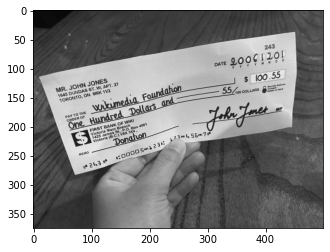

In [27]:
# gray = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
pltshow(gray)
# plt.imshow(edged)

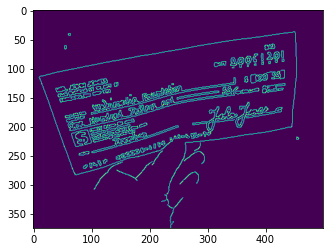

In [28]:
plt.imshow(edged)

In [29]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

receiptCnt = None
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print(len(approx))
    if len(approx) == 4:
        receiptCnt = approx
        print(receiptCnt)
        break
if receiptCnt is None:
    raise Exception(("No outline, oof"))

18
13
6
9
10
10
9
11
3
7
2
2
11
13
13
11
14
8
10
8
13
8
10
12
7
7
12
7
16
11
11
9
10
7
6
9
16
10
8
9
8
2
5
7
5
11
6
12
10
9
11
9
10
8
7
9
7
10
14
11
11
8
4
[[[208 230]]

 [[208 237]]

 [[211 237]]

 [[211 230]]]


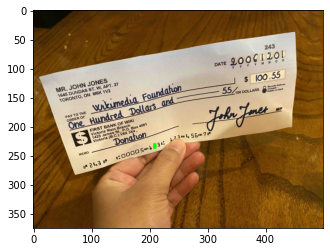

In [30]:
output = image.copy()
cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
pltshow(output)

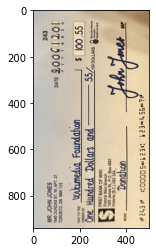

In [25]:
receipt = four_point_transform(orig, receiptCnt.reshape(4, 2) * ratio)
pltshow(imutils.resize(receipt, width=500))